In [ ]:

import tensorflow as tf


#Importing the Data
Using data from our github repo, we will be using 220 images per section to train our network.


In [ ]:
from google.colab import drive
import os, shutil
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


The training data:

In [ ]:
#base directory for the folder
dataset_folder = '/content/drive/MyDrive/Run 1'

if not os.path.exists(dataset_folder):
  os.mkdir(dataset_folder)

#separate the different "sections" from Run1

section0_folder = os.path.join(dataset_folder, "SECTION0")
if not os.path.exists(section0_folder):
  os.mkdir(section0_folder)
  print("fail")

section1_folder = os.path.join(dataset_folder, "SECTION1")
if not os.path.exists(section1_folder):
  os.mkdir(section1_folder)
  print("fail")

section2_folder = os.path.join(dataset_folder, "SECTION2")
if not os.path.exists(section2_folder):
  os.mkdir(section2_folder)
  print("fail")

section3_folder = os.path.join(dataset_folder, "SECTION3")
if not os.path.exists(section3_folder):
  os.mkdir(section3_folder)
  print("fail")

section4_folder = os.path.join(dataset_folder, "SECTION4")
if not os.path.exists(section4_folder):
  os.mkdir(section4_folder)
  print("fail")

section5_folder = os.path.join(dataset_folder, "SECTION5")
if not os.path.exists(section5_folder):
  os.mkdir(section5_folder)
  print("fail")

section6_folder = os.path.join(dataset_folder, "SECTION6")
if not os.path.exists(section6_folder):
  os.mkdir(section6_folder)
  print("fail")

section7_folder = os.path.join(dataset_folder, "SECTION7")
if not os.path.exists(section7_folder):
  os.mkdir(section7_folder)
  print("fail")


The validation data:

In [ ]:

#base directory for the folder
vset_folder = '/content/drive/MyDrive/Validation1'


if not os.path.exists(vset_folder):
  os.mkdir(vset_folder)

#separate the different "sections" from Run1

vsection0_folder = os.path.join(vset_folder, "SECTION0")
if not os.path.exists(vsection0_folder):
  os.mkdir(vsection0_folder)
  print("fail")

vsection1_folder = os.path.join(vset_folder, "SECTION1")
if not os.path.exists(vsection1_folder):
  os.mkdir(vsection1_folder)
  print("fail")

vsection2_folder = os.path.join(vset_folder, "SECTION2")
if not os.path.exists(vsection2_folder):
  os.mkdir(vsection2_folder)
  print("fail")

vsection3_folder = os.path.join(vset_folder, "SECTION3")
if not os.path.exists(vsection3_folder):
  os.mkdir(vsection3_folder)
  print("fail")

vsection4_folder = os.path.join(vset_folder, "SECTION4")
if not os.path.exists(vsection4_folder):
  os.mkdir(vsection4_folder)
  print("fail")

vsection5_folder = os.path.join(vset_folder, "SECTION5")
if not os.path.exists(vsection5_folder):
  os.mkdir(vsection5_folder)
  print("fail")

vsection6_folder = os.path.join(vset_folder, "SECTION6")
if not os.path.exists(vsection6_folder):
  os.mkdir(vsection6_folder)
  print("fail")

vsection7_folder = os.path.join(vset_folder, "SECTION7")
if not os.path.exists(vsection7_folder):
  os.mkdir(vsection7_folder)
  print("fail")

In [ ]:
print("total number of images in section 0: ", len(os.listdir(section0_folder)))

total number of images in section 0:  129


In [ ]:
print("total number of images in section 1: ", len(os.listdir(section1_folder)))

total number of images in section 1:  198


In [ ]:
print("total number of images in section 2: ", len(os.listdir(section2_folder)))

total number of images in section 2:  112


In [ ]:
print("total number of images in section 3: ", len(os.listdir(section3_folder)))

total number of images in section 3:  221


In [ ]:
print("total number of images in section 4: ", len(os.listdir(section4_folder)))

total number of images in section 4:  221


In [ ]:
print("total number of images in section 5: ", len(os.listdir(section5_folder)))

total number of images in section 5:  201


In [ ]:
print("total number of images in section 6: ", len(os.listdir(section6_folder)))

total number of images in section 6:  189


In [ ]:
print("total number of images in section 7: ", len(os.listdir(section7_folder)))

total number of images in section 7:  169


#Building the CNN
Using the model of the convnet from the Cats and Dogs classification problem, we are building the network for our dataset.

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
from tensorflow.keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['acc'])

#Data Preprocessing 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        dataset_folder,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=8,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        vset_folder,
        target_size=(150, 150),
        batch_size=8,
        class_mode='categorical')


Found 1431 images belonging to 8 classes.
Found 610 images belonging to 8 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (8, 150, 150, 3)
labels batch shape: (8, 8)


In [ ]:

history = model.fit(
      train_generator,
      steps_per_epoch=20,
      epochs=30,
      validation_data=validation_generator
      )

Epoch 1/30
20/20 [==============================] - 21s 1s/step - loss: 2.0793 - acc: 0.3016 - val_loss: 2.0792 - val_acc: 0.2154
Epoch 2/30
20/20 [==============================] - 20s 1s/step - loss: 2.0788 - acc: 0.3969 - val_loss: 2.0788 - val_acc: 0.2254
Epoch 3/30
20/20 [==============================] - 20s 1s/step - loss: 2.0784 - acc: 0.4195 - val_loss: 2.0782 - val_acc: 0.2418
Epoch 4/30
20/20 [==============================] - 20s 1s/step - loss: 2.0781 - acc: 0.4023 - val_loss: 2.0776 - val_acc: 0.1855
Epoch 5/30
20/20 [==============================] - 20s 1s/step - loss: 2.0787 - acc: 0.4308 - val_loss: 2.0773 - val_acc: 0.1619
Epoch 6/30
20/20 [==============================] - 20s 1s/step - loss: 2.0775 - acc: 0.4336 - val_loss: 2.0765 - val_acc: 0.1654
Epoch 7/30
20/20 [==============================] - 20s 1s/step - loss: 2.0767 - acc: 0.3961 - val_loss: 2.0757 - val_acc: 0.1773
Epoch 8/30
20/20 [==============================] - 20s 1s/step - loss: 2.0745 - acc: 0.38

In [ ]:
model.save('geoguessr.h5')

#Plotting
Below is the accuracy and loss of our model plotted for the 30 epochs.

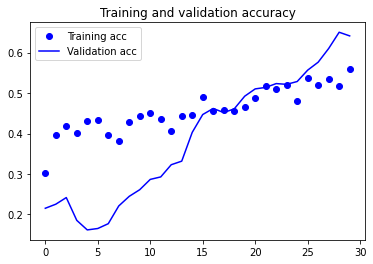

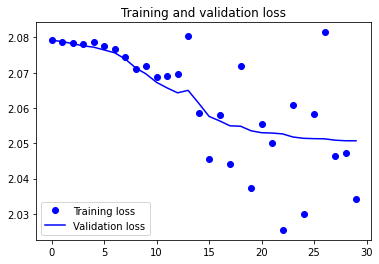

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()